In [1]:
from utils.plotter import get_roc_curves_from_df
from utils.wandb_calls import fetch_files_from_runs
import os
import pandas as pd
import pickle
import shutil

In [2]:
for folder in os.listdir("./results/"):
    if "acdc" in folder:
        shutil.rmtree(f"./results/{folder}")

In [2]:
project = "circuit_discovery"
group = "acdc"
files_to_fetch = ["result.pkl"]
fetch_files_from_runs(project, group, files_to_fetch)

100%|██████████| 288/288 [01:12<00:00,  3.95it/s]


In [11]:
def walk_dirs_and_get_scores(weight = 510):
    def append_row(table, row):
        return pd.concat([
                    table, 
                    pd.DataFrame([row], columns=row.index)]
            ).reset_index(drop=True)
    
    # make an empty table with columns: run, threshold, tpr, fpr
    df = pd.DataFrame(columns=["run", "threshold", "node_tpr", "node_fpr", "edge_tpr", "edge_fpr"])
    for folder in os.listdir("results"):
        if "acdc" not in folder:
            continue
        weight_folder = os.path.join("results", folder, f"weight_{weight}")
        if not os.path.exists(weight_folder):
            continue
        print(weight_folder)
        for thresholds_folder in os.listdir(weight_folder):
            results_file = os.path.join(weight_folder, thresholds_folder, "result.pkl")
            if not os.path.exists(results_file):
                continue
            result = pickle.load(open(results_file, "rb"))
            run = folder.split("_")[-1]
            threshold = float(thresholds_folder.split("_")[-1])
            entry = {"run": run, "threshold": threshold, 
                    "node_tpr": result["nodes"]["tpr"],
                    "node_fpr": result["nodes"]["fpr"],
                    "edge_tpr": result["edges"]["tpr"],
                    "edge_fpr": result["edges"]["fpr"]}
            if 'N/A' in entry.values():
                print(f"Skipping {run} {threshold}")
                continue
            entry = pd.Series(entry)
            df = append_row(df, entry)
    return df

In [12]:
iit_result = walk_dirs_and_get_scores()

results/acdc_3/weight_510
results/acdc_4/weight_510
results/acdc_11/weight_510
results/acdc_16/weight_510
results/acdc_21/weight_510
results/acdc_38/weight_510
results/acdc_8/weight_510
results/acdc_24/weight_510
results/acdc_13/weight_510


/var/folders/_k/_46xyqdj165bdcyw79k6758w0000gn/T/ipykernel_8038/985209818.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([


In [13]:
tracr_result = walk_dirs_and_get_scores(weight="tracr")

results/acdc_3/weight_tracr
results/acdc_4/weight_tracr
results/acdc_11/weight_tracr
results/acdc_16/weight_tracr
results/acdc_21/weight_tracr
results/acdc_38/weight_tracr
results/acdc_8/weight_tracr
Skipping 8 0.0
Skipping 8 0.1
Skipping 8 0.8
Skipping 8 1e-05
Skipping 8 0.025
Skipping 8 100.0
Skipping 8 0.001
Skipping 8 10.0
Skipping 8 50.0
Skipping 8 0.01
Skipping 8 0.0001
Skipping 8 0.2
Skipping 8 0.5
Skipping 8 20.0
Skipping 8 1.0
Skipping 8 0.05
results/acdc_24/weight_tracr
results/acdc_13/weight_tracr


/var/folders/_k/_46xyqdj165bdcyw79k6758w0000gn/T/ipykernel_8038/985209818.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([


In [14]:
sl_result = walk_dirs_and_get_scores(weight="100")

results/acdc_3/weight_100
results/acdc_4/weight_100
results/acdc_11/weight_100
results/acdc_16/weight_100
results/acdc_21/weight_100
results/acdc_38/weight_100
results/acdc_8/weight_100
results/acdc_24/weight_100
results/acdc_13/weight_100


/var/folders/_k/_46xyqdj165bdcyw79k6758w0000gn/T/ipykernel_8038/985209818.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([


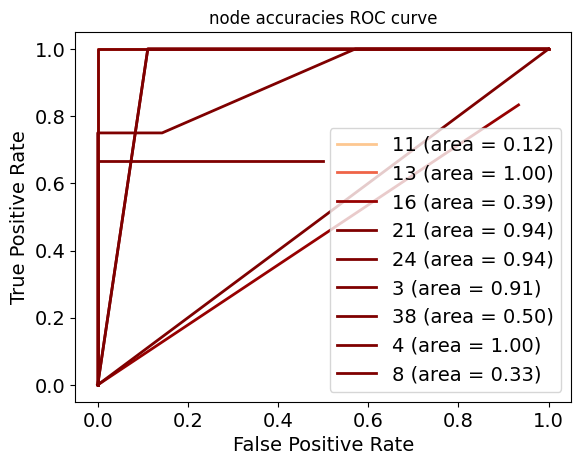

In [15]:
title = "node accuracies"
get_roc_curves_from_df(iit_result, title=title)

In [18]:
tracr_result.groupby("run").get_group("16")

,run,threshold,node_tpr,node_fpr,edge_tpr,edge_fpr
48,16,0.00000,1.0,1.0,1.0,1.0
49,16,0.10000,0.0,0.0,0.0,0.0
50,16,0.80000,0.0,0.0,0.0,0.0
51,16,0.00001,0.0,0.0,0.0,0.0
52,16,0.02500,0.0,0.0,0.0,0.0
53,16,100.00000,0.0,0.0,0.0,0.0
54,16,0.00100,0.0,0.0,0.0,0.0
55,16,10.00000,0.0,0.0,0.0,0.0
56,16,50.00000,0.0,0.0,0.0,0.0
57,16,0.01000,0.0,0.0,0.0,0.0


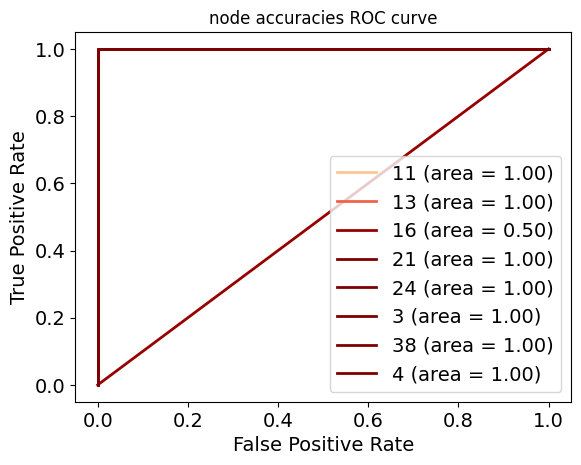

In [16]:
title = "node accuracies"
get_roc_curves_from_df(tracr_result, title=title)

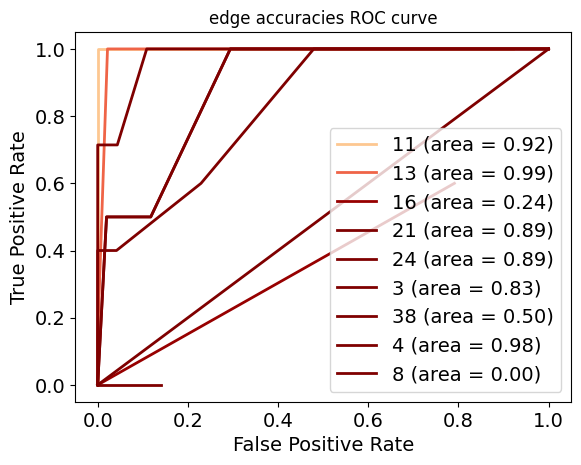

In [9]:
get_roc_curves_from_df(iit_result, title="edge accuracies", nodes=False)

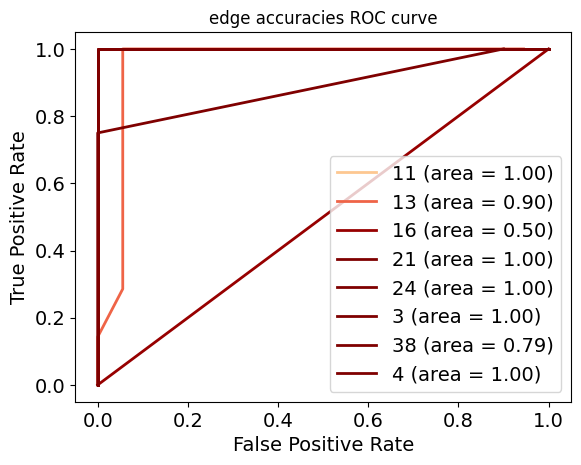

In [10]:
get_roc_curves_from_df(tracr_result, title="edge accuracies", nodes=False)

Rough

In [20]:
# get all unique runs
print(iit_result["run"].unique())

['3' '4' '27' '21' '38' '8' '24' '13']


In [22]:
iit_result.groupby("run").get_group("8").sort_values("threshold", ascending=False)

,run,threshold,node_tpr,node_fpr,edge_tpr,edge_fpr
80,8,100.00000,0.666667,0.000,0.000000,0.00
83,8,50.00000,1.000000,0.125,0.666667,0.04
87,8,20.00000,1.000000,0.250,0.666667,0.08
82,8,10.00000,1.000000,0.250,0.666667,0.08
88,8,1.00000,1.000000,0.250,0.666667,0.08
77,8,0.80000,1.000000,0.250,0.666667,0.10
86,8,0.50000,0.666667,0.375,0.000000,0.12
76,8,0.10000,0.666667,0.375,0.000000,0.12
89,8,0.05000,0.666667,0.375,0.000000,0.12
79,8,0.02500,0.666667,0.375,0.000000,0.14


In [13]:
def show_df(df, title):
    tprs = []
    fprs = []
    labels = []
    for run, entries in df.groupby("run"):
        entries = entries.sort_values("threshold", ascending=False)
        tpr = entries["node_tpr"].tolist()
        fpr = entries["node_fpr"].tolist()
        tprs.append(tpr)
        fprs.append(fpr)
        labels.append(run)
    return tprs, fprs, labels

In [14]:
t, f, l = show_df(sl_result, title)
for i in range(len(t)):
    print(f[i], t[i], l[i])

[0.0, 0.0, 0.0, 0.0, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.3333333333333333, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333334, 0.8333333333333334, 1.0, 1.0, 1.0] [0.0, 0.0, 0.0, 0.0, 0.8, 0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] 13
[0.0, 0.0, 0.0, 0.0, 0.2222222222222222, 0.2222222222222222, 0.2222222222222222, 0.3333333333333333, 0.4444444444444444, 0.5555555555555556, 0.6666666666666666, 0.6666666666666666, 0.7777777777777778, 0.8888888888888888, 0.6666666666666666, 1.0] [0.0, 0.0, 0.0, 0.0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0] 21
[0.0, 0.0, 0.0, 0.0, 0.2222222222222222, 0.2222222222222222, 0.2222222222222222, 0.3333333333333333, 0.4444444444444444, 0.5555555555555556, 0.6666666666666666, 0.6666666666666666, 0.7777777777777778, 0.8888888888888888, 0.6666666666666666, 1.0] [0.0, 0.0, 0.0, 0.0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0] 24
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.125, 0.125, 0.

In [15]:
pickle.load(open("results/acdc_19/weight_tracr/threshold_0.0/result.pkl", "rb"))['nodes']['fpr']

FileNotFoundError: [Errno 2] No such file or directory: 'results/acdc_19/weight_tracr/threshold_0.0/result.pkl'